# Hipotesis

Existe una relación entre la energia calorica y los nutrientes, vitaminas y minerales del alimento, en particular las grasas y los carbohidratos deberían ser los que más influyen en el contenido calórico del alimentos

# Teoría

### Energía Calórica

La energía que necesita nuestro organimsmo para poder mantener funcionando efectivamente todos los órganos y sistemas corporales proviene esencialmenmte de los alimentos que se consumen diariamente, particularmenete de aquellos nutrientes que proveen calorías (conocidos también como sustratos, macromoléculas o combustribles metabólicos), los cuales son:  los hidratos de carbono, grasas y proteínas. La energía que poseen estos nutrientes se encuentra almacenada en forma química. 

### Fuentes de energía para el ser humano

Durante la digestión, los alimentos se degradan en  hidratos de carbono, grasas y proteínas y eventualmente son absorbidos por la sangre a nivel intestinal. Una vez en el torrente sanguíneo serán empleados como sustratos en el metabolismo celular o almacvenados en el cuerpo. A nivel celular, estos sustratos son utilizados para la producción de energía.

La energía derivada durante el metabolismo de los combustibles metabólicos se transforma en un estado molecular conocido como adenosina de trifosfato (ATP). El ATP es un compuesto de alta energía que producen las células al utilizar los nutrientes calóricos que provienen de las plantas y animales. Entonces, ¿cómo se libera la energía necesaria para las funciones biológicas de nuestro cuerpo?. Cuando el cuerpo demanda energía, este comuesto se descompone,  produciendo así energía para las diferentes funciones vitales del cuerpo (e.g., contracción muscular, digestión, secreción glandular, reparación de tejidos, circulación, transmisión nerviosa, entre otras.).

### Unidad de Medición para la Energía

La energía que potencialmente poseen los alimentos y la que se libera de los procesos bioquímicos se miede en términos de caloría (caloría pequeña) o kilocaloría (caloría grande). Estas son las unidades de calor utilizada para expresar el valor energético de los alimentos y del movimiento humano (ejercicios y actividad física).

Una  kilocaloría representa la cantidad de calor requerido para elevar la temperatura de un kilogramo (2.2 lbs ó 1 litro) de agua destilada a un grado Centírado (de 14° a 15.5 °C ), a nievel del mar (i.e., a una presión barométrica de 1 atmósfera ó 760 mm. Hg.).

# Visualización de datos

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
food = pd.read_csv("food_ML.csv")

Considero que hay grpos de alimentos que deberían estar fuera del analisis, debido a que la mayoría de alimentos dentro de estoss grupos son altamente procesados. Se procederá a eliminar estos grupos

In [3]:
food.FoodGroup.value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [4]:
grupos_eliminar = ["Fast Foods", "Breakfast Cereals", "Sweets", "Snacks",
                   "American Indian/Alaska Native Foods",
                   "Meals, Entrees, and Side Dishes", "Restaurant Foods",
                   "Spices and Herbs", "Beverages"]

In [5]:
for grupo in grupos_eliminar:
    condicion = food.FoodGroup == grupo
    food.drop(food[condicion].index, inplace=True)

Ahora se usara un scaterplot para observar si es posible que existan correlaciones entre los nutrientes y la cantidad energética

In [132]:
x_var = ['Protein_mg', 'Fat_mg', 'Carb_mg', 'Sugar_mg', 'Fiber_mg']
x_var1 = ['VitA_mg', 'VitB6_mg', 'VitB12_mg', 'VitC_mg', 'VitE_mg']
y_var = ["Energy_kcal"]

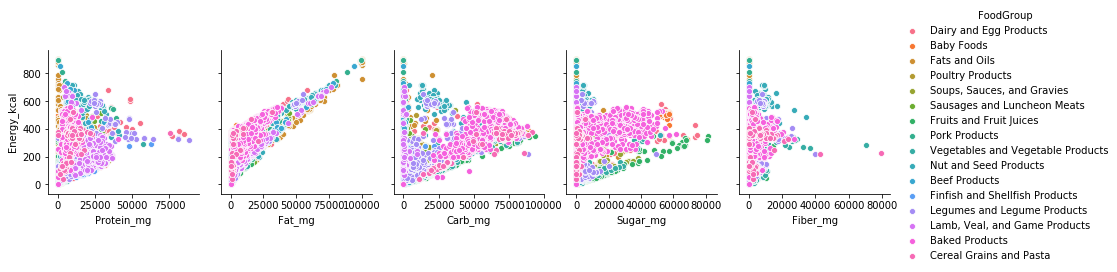

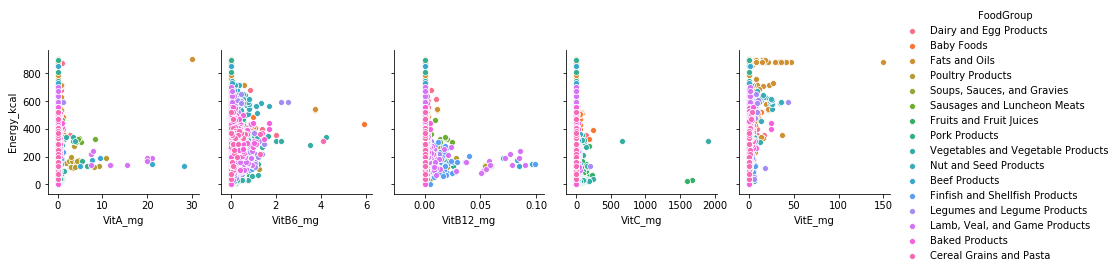

In [123]:
sns.pairplot(food, hue="FoodGroup", y_vars=y_var, x_vars=x_var)
sns.pairplot(food, hue="FoodGroup", y_vars=y_var, x_vars=x_var1);

In [ ]:
x_var2 = ['Folate_mg', 'Niacin_mg',
          'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg']
x_var3 = ['Copper_mg', 'Iron_mg', 'Magnesium_mg',
          'Manganese_mg', 'Phosphorus_mg']

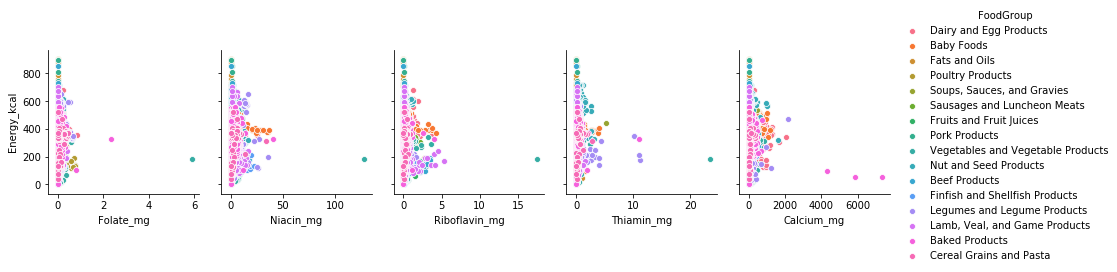

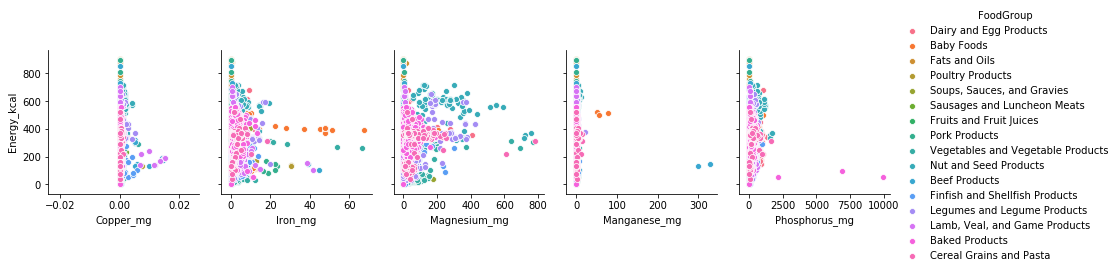

In [7]:
sns.pairplot(food, hue="FoodGroup", y_vars=y_var, x_vars=x_var2)
sns.pairplot(food, hue="FoodGroup", y_vars=y_var, x_vars=x_var3);

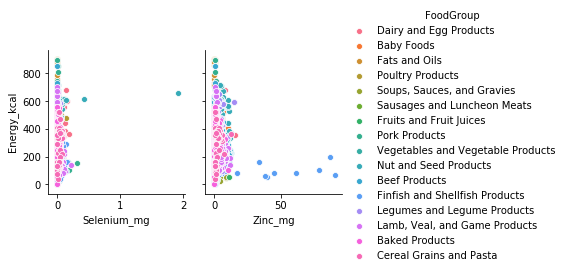

In [8]:
x_var4 = ['Selenium_mg', 'Zinc_mg']
sns.pairplot(food, hue="FoodGroup", y_vars=y_var, x_vars=x_var4);

Al observar las gráficas podemos observar que existe una mayor correlación entre "Fat" y la energía, al inicio de la gráfica se encuentran un poco dispersos los datos, pienso que deben existir otras variables como los carbohidratos que pueden linealizar más la gráfica y e esta manera poder predecir la energía caloríca de una mejor manera.

Las vitaminas y los minerales, además que la mayoría de los alimentos analizados tienen pocas cantidades, a simple vista observamos que no hay una correlación entre la energía y estos nutrientes.

De cualquier manera, se usara seleccion cruzada para elegir las columnas importantes.

# Elección y entrenamiento de modelo

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Despues de varios entrenamientos me di cuenta que las columnas que más aportaban eran las proteínas, las grasas y los carbohidratos. Los coeficientes que proporcionaban las demás variables tendian a ser cero.

In [133]:
x_var.pop()
x_var.pop()
columnas = x_var
X = food[columnas]
Y = food.Energy_kcal

In [134]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=50)
food_model = LinearRegression()
food_model.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Resultados

In [137]:
inter = food_model.intercept_
protein, fat, carb = food_model.coef_
R2 = food_model.score(train_X, train_Y)
predicciones = food_model.predict(val_X)
MAE = mean_absolute_error(val_Y, predicciones)
MSE = mean_squared_error(val_Y, predicciones)
r2 = r2_score(val_Y, predicciones)
RMSE = np.sqrt(MSE)

Así que la ecuación que describe nuestros datos de entrenamiento es:

$E =$ {{protein}} $\frac{kcal}{mg} *P$ + {{fat}}$\frac{kcal}{mg} *F$ + {{carb}}$ \frac{kcal}{mg} *C $ {{inter}} $     kcal$

Donde:

* P => Proteina
* F => Grasa
* C => Carbohidratos
* E => Energía

Comparandolo los valores de prediccion y los valores del dataset tenemos un 

**MAE = {{MAE}} kcal**

**MSE = {{MSE}} kcal²**

**RMSE = {{RMSE}} kcal**

**R² = {{r2}}** 

# Conclusiones

Nuestra hipótesis es correcta, existe correlación entre tres variables de nuestro dataset y la variable energía.

Revisando la literatura pude encontrar que nutriólogos y cientificos relacionados en el área de la alimentación y nutrición utilizan tres constantes para determinar el contenido calórico de los alimentos, estos números coinciden con los resultados obtenidos en nuestro modelo.

En cuánto a los resultados de nuestro modelo, podemos observar que el error es mínimo, no solo para los datos de entrenamiento, si no también para los datos de predicción.

El modelo es altamente efectivo para la predicción de contenido energético en los alimentos. Únicamente necesitamos saber las grasas, carbohidratos y proteínas para calcular las calorías del alimento de una manera indirecta.

# Referencias

Lopategui, Corsino, E. (2002). saludmen.com . http://www.saludmed.com/CtrlPeso/BalEnerg/BalEnerg.html